# Predicting Heart Disease using Machine Learning

## 1.Problem Definition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features
different information about each of the features in your data.
age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type
 0: Typical angina: chest pain related decrease blood supply to the heart
 1: Atypical angina: chest pain not related to heart
 2: Non-anginal pain: typically esophageal spasms (non heart related)
 3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl
 serum = LDL + HDL + .2 * triglycerides
 above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
 0: Nothing to note
 1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
 2: Possible or definite left ventricular hypertrophy
 Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will 

stress more

slope - the slope of the peak exercise ST segment
 0: Upsloping: better heart rate with excercise (uncommon)
 1: Flatsloping: minimal change (typical healthy heart)
 2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
 colored vessel means the doctor can see the blood passing through
 the more blood movement the better (no clots)

thal - thalium stress result
 1,3: normal
 6: fixed defect: used to be defect but ok now
 7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Importing all the required libs

In [1]:
#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluators

from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV


In [2]:
df=pd.read_csv('heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

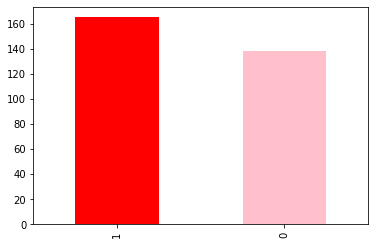

In [6]:
df['target'].value_counts().plot(kind='bar',color=['red','pink'])

In [7]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


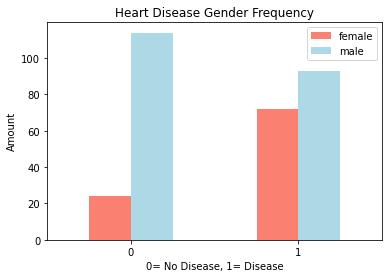

In [9]:
ax=pd.crosstab(df['target'],df['sex']).plot(kind='bar',color=['salmon','lightblue']);
ax.set(xlabel='0= No Disease, 1= Disease')
ax.set(title='Heart Disease Gender Frequency',ylabel='Amount')
ax.legend(['female','male'])
plt.xticks(rotation=0);

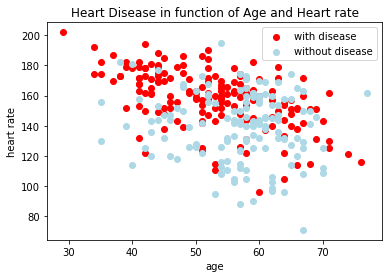

In [10]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')
plt.title('Heart Disease in function of Age and Heart rate')
plt.xlabel('age')
plt.ylabel('heart rate')
plt.legend(['with disease','without disease'])

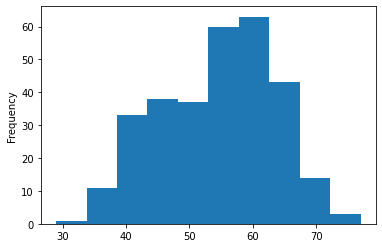

In [11]:
df.age.plot.hist(bins=10);

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

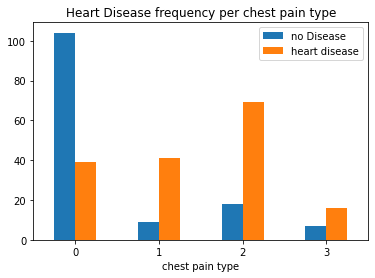

In [12]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.legend(['no Disease','heart disease'])
plt.xlabel('chest pain type')
plt.title('Heart Disease frequency per chest pain type')
plt.xticks(rotation=0)

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


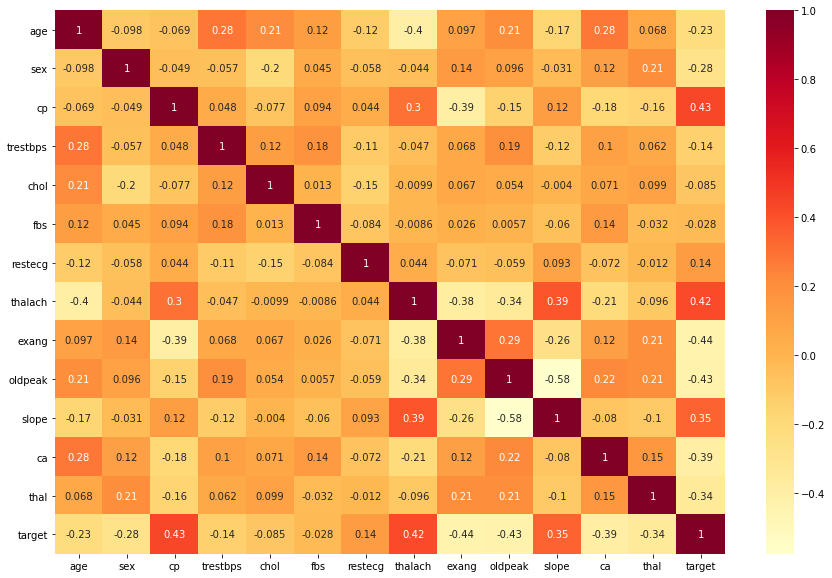

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,
           annot=True,
           cmap='YlOrRd')

In [15]:
X=df.drop('target',axis=1)
y=df.target

In [16]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Which model to use?

In [17]:
models={'LogisticRegression': LogisticRegression(),
       'Kneighbours': KNeighborsClassifier(),
       'Randomforest': RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [18]:
Model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
Model_scores

C:\Users\shr3y\ds-projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'Kneighbours': 0.6885245901639344,
 'Randomforest': 0.8360655737704918}

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

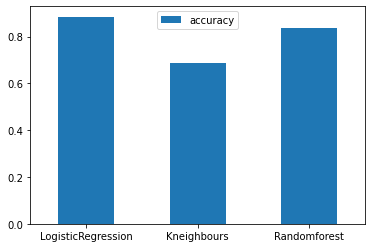

In [19]:
model_compare=pd.DataFrame(Model_scores,index=['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation=0)


In [20]:
neighbours=range(1,21)
train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [21]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

0.7540983606557377


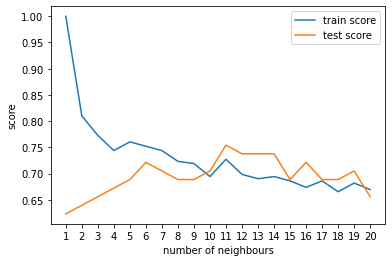

In [27]:
plt.plot(neighbours,train_scores,label='train score')
plt.plot(neighbours,test_scores,label='test score')
plt.xlabel('number of neighbours')
plt.ylabel('score')
plt.xticks(np.arange(1,21,1))
plt.legend(['train score','test score'])
print(max(test_scores))

# Hyper Parameter Tuninig

In [38]:
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

rand_grid={'n_estimators': np.arange(10,1000,50),
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [30]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
 rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
 rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [39]:
np.random.seed(42)
rs_rand=RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rand_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rand.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rand.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
rs_rand.score(X_test,y_test)

0.8688524590163934

In [42]:
log_reg_grid={'C': np.logspace(-4,4,30),
             'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating

In [46]:
y_preds=gs_log_reg.predict(X_test)

In [47]:
 y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

 # Plot ROC Curve

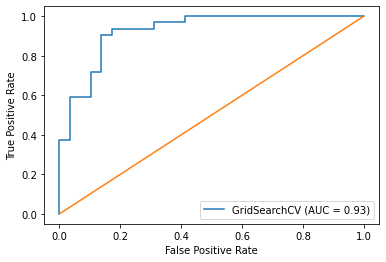

In [50]:
plot_roc_curve(gs_log_reg,X_test,y_test)
plt.plot([0,1],[0,1])

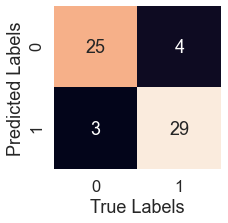

In [55]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')

plot_conf_mat(y_test,y_preds)

In [56]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Precision,recall,F1

In [59]:
gs_log_reg.best_params_



{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver='liblinear')

In [73]:
accuracy=cross_val_score(clf,X,y,scoring='accuracy',cv=5)
accuracy=np.mean(accuracy)
accuracy

0.8446994535519124

In [66]:
precision=cross_val_score(clf,X,y,scoring='precision',cv=5)

precision=np.mean(precision)
precision


0.8207936507936507

In [69]:
recall=cross_val_score(clf,X,y,scoring='recall',cv=5)
recall=np.mean(recall)
recall

0.9212121212121213

In [71]:
f1=cross_val_score(clf,X,y,scoring='f1',cv=5)
f1=np.mean(f1)
f1

0.8673007976269721

In [76]:
cv_metrics=pd.DataFrame({'Accuracy':accuracy,
                        'Precision':precision,
                        'Recall':recall,
                        'F1':f1},
                       index=[0])

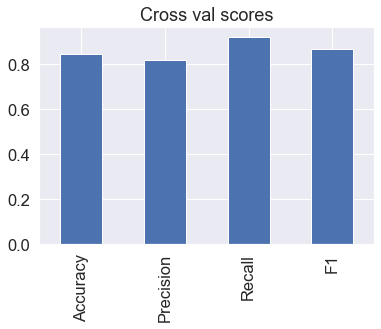

In [81]:
cv_metrics.T.plot.bar(title='Cross val scores',legend=False);

# Feature Importance

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
clf.fit(X_train,y_train);
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [90]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))

In [91]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

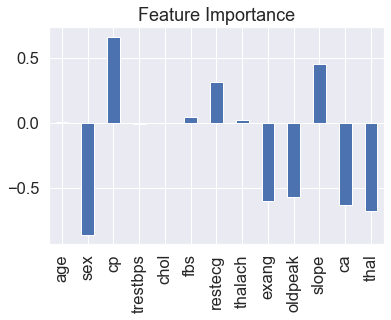

In [93]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False)